In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Load the dataset
data = pd.read_csv('/content/California_Housing.csv')
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [2]:
# Separate features and target variable
# Assuming the target variable is 'Price' and the rest are features
X = data.drop(columns=['Price'])
y = data['Price']

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Add a bias (intercept) term with value 1 to each instance
X_train_scaled_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_scaled_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]


In [6]:
# Compute the coefficients using the Normal Equation
X_b_T = X_train_scaled_b.T
theta = np.linalg.inv(X_b_T @ X_train_scaled_b) @ X_b_T @ y_train

# Make predictions on the test set
y_pred = X_test_scaled_b @ theta

# Display the coefficients
theta_df = pd.DataFrame(theta, index=['Intercept'] + list(X.columns), columns=['Coefficient'])
print("Coefficients:")
print(theta_df)

Coefficients:
            Coefficient
Intercept      2.071947
MedInc         0.854383
HouseAge       0.122546
AveRooms      -0.294410
AveBedrms      0.339259
Population    -0.002308
AveOccup      -0.040829
Latitude      -0.896929
Longitude     -0.869842


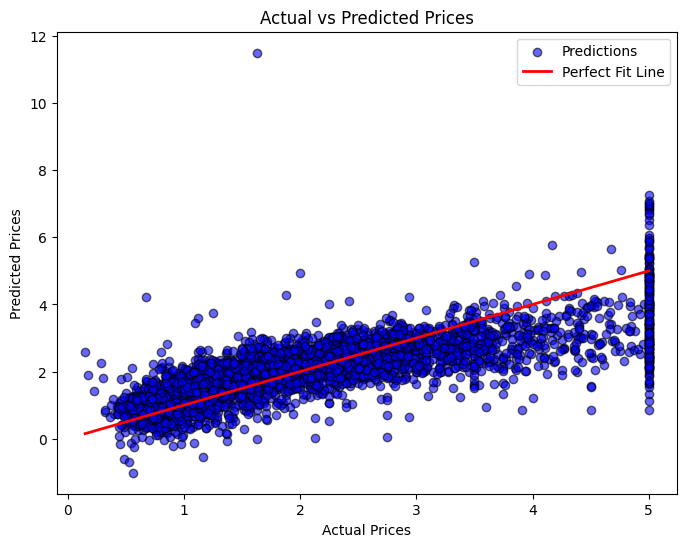

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Fit Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

In [8]:
# Evaluate Model (optional)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.555891598695244
Root Mean Squared Error: 0.7455813830127761
Mean Absolute Error: 0.5332001304956564
R-squared: 0.5757877060324511


Since we have already obtained the coefficients, the practical task is considered complete. Evaluating the model is optional; however, since we have performed the evaluation, we observed that the values of MAE, MSE, RMSE, and R-squared indicate that there is room for improvement.

To enhance model performance, we can consider the following approaches:

Feature Engineering: Creating new features or transforming existing ones might improve model accuracy.

Polynomial Features: Introducing polynomial features to capture non-linear relationships in the data.

Regularization: Applying techniques such as Ridge or Lasso regression to reduce overfitting and improve generalization.

Advanced Models: Experimenting with more sophisticated regression algorithms like decision trees, random forests, or gradient boosting methods.

Hyperparameter Tuning: Adjusting model parameters to find the optimal configuration.

These methods can help in achieving better performance metrics and improving the overall effectiveness of the model.